<a href="https://colab.research.google.com/github/sasi-nk/dataviz2025/blob/main/Copy_of_Final_group_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Group 3

นางสาวไอวรินทร์ ชื่นแสน 663020587-2

นายนราวิชญ์ โสวัน 663020283-2

นายวชากร สุขเกษม 663020293-9

นางสาวกรวลัย แสนสิงห์ 663020276-9

นางสาวศศิกานต์ ทิพย์สูงเนิน 663020297-1

บุณยนุช อินทวงษ์ 663020582-2


# Looker studio


https://lookerstudio.google.com/reporting/36087b2a-32e9-49d6-8dee-53ff3a3bc5fc


# จัดการข้อมูล

In [ ]:
# TODO: ติดตั้ง packages ที่จำเป็น
# Hint: ใช้ !pip install ... -q

# เขียนโค้ดที่นี่

!pip install gspread -q
!pip install google-auth -q
!pip install google-auth-oauthlib -q
!pip install google-auth-httplib2 -q
!pip install openpyxl -q
print("✅ ติดตั้ง libraries สำเร็จ")

✅ ติดตั้ง libraries สำเร็จ


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import pandas as pd

# เชื่อมต่อ Google Drive (จะมีหน้าต่างให้ยืนยันสิทธิ์)
drive.mount('/content/drive')

# เปลี่ยน 'Your_File_Path/your_data_file.csv'
# เป็นที่อยู่จริงของไฟล์ของคุณใน Google Drive
# (เช่น '/content/drive/MyDrive/DataSets/netflix_movies.csv')
file_path = '/content/drive/MyDrive/T.Ton/Netflix-movies.xlsx'

# อ่านไฟล์ Excel
try:
    df = pd.read_excel(file_path)
    print(f"Data loaded successfully from Google Drive at: {file_path}")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data loaded successfully from Google Drive at: /content/drive/MyDrive/T.Ton/Netflix-movies.xlsx


In [ ]:
df

,Movie Title,Director,Country,Release Year,Rating,Length,Genre
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries
1,My Little Pony: A New Generation,Robert Cullen,Not listed,2021,PG,91 min,Children & Family Movies
2,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
3,The Starling,Theodore Melfi,United States,2021,PG-13,104 min,"Comedies, Dramas"
4,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies"
...,...,...,...,...,...,...,...
6126,Zinzana,Majid Al Ansari,"United Arab Emirates, Jordan",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers"
6127,Zodiac,David Fincher,United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
6128,Zombieland,Ruben Fleischer,United States,2009,R,88 min,"Comedies, Horror Movies"
6129,Zoom,Peter Hewitt,United States,2006,PG,88 min,"Children & Family Movies, Comedies"


In [ ]:
# TODO: ตรวจสอบค่า missing ใน DataFrame df
# Hint: ใช้ df.isnull().sum()

# เขียนโค้ดที่นี่
print("จำนวนค่า missing ในแต่ละคอลัมน์:")
display(df.isnull().sum())

จำนวนค่า missing ในแต่ละคอลัมน์:


,0
Movie Title,0
Director,188
Country,0
Release Year,0
Rating,2
Length,3
Genre,0


In [ ]:
# TODO: เติมค่า missing ใน df ตามประเภทของคอลัมน์
# ถ้าคอลัมน์เป็นคุณภาพให้เติม 'unknown'
# ถ้าคอลัมน์เป็นปริมาณให้เติมค่าเฉลี่ย

# เขียนโค้ดที่นี่
for col in df.columns:
    if df[col].dtype == 'object':  # ตรวจสอบว่าเป็นคอลัมน์ประเภท object (คุณภาพ)
        df[col].fillna('unknown', inplace=True)
    else:  # ถ้านอกเหนือจากนั้น (ถือว่าเป็นปริมาณ)
        # คำนวณค่าเฉลี่ยเฉพาะคอลัมน์ที่เป็นตัวเลขและมีค่าที่ไม่ใช่ NaN
        if pd.api.types.is_numeric_dtype(df[col]):
            mean_val = df[col].mean()
            df[col].fillna(mean_val, inplace=True)

# ตรวจสอบค่า missing อีกครั้งหลังเติมค่า
print("จำนวนค่า missing ในแต่ละคอลัมน์หลังเติมค่าตามประเภท:")
display(df.isnull().sum())

จำนวนค่า missing ในแต่ละคอลัมน์หลังเติมค่าตามประเภท:


/tmp/ipython-input-3633920717.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('unknown', inplace=True)
/tmp/ipython-input-3633920717.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

,0
Movie Title,0
Director,0
Country,0
Release Year,0
Rating,0
Length,0
Genre,0


In [ ]:
# เชื่อมต่อ Google Drive
drive.mount('/content/drive')

# ตั้งชื่อไฟล์ (โปรดตรวจสอบและเปลี่ยน Your_File_Path/Your_File_Name.xlsx ให้ถูกต้อง)
# หากไฟล์เดิมของคุณเป็น CSV คุณต้องแปลงเป็น Excel หรือ Google Sheet ก่อน
file_path = '/content/drive/MyDrive/T.Ton/Netflix-movies.xlsx'

# อ่านข้อมูลจากไฟล์ Excel โดยระบุชื่อชีตที่ต้องการ
# เราจะระบุชื่อชีตเป็น 'Rotten Tomatoes Score'
try:
    df_rotten_tomatoes = pd.read_excel(
        file_path,
        sheet_name='Rotten Tomatoes Score'
    )
    print(f"Data from sheet 'Rotten Tomatoes Score' loaded successfully.")

except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path.")
except ValueError:
    print("Error: Sheet name 'Rotten Tomatoes Score' not found. Please check the sheet name or file format.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data from sheet 'Rotten Tomatoes Score' loaded successfully.


In [ ]:
# แสดง 5 แถวแรกของข้อมูลชีต 'Rotten Tomatoes Score'
df_rotten_tomatoes.head()

,Movie Title,TOMATOMETER,# of Tomatometer Reviews,AUDIENCE SCORE,# of Audience Reviews
0,Percy Jackson & the Olympians: The Lightning T...,49.0,149.0,53.0,254421.0
1,Please Give,87.0,142.0,64.0,11574.0
2,10,67.0,24.0,53.0,14684.0
3,12 Angry Men (Twelve Angry Men),100.0,54.0,97.0,105386.0
4,"20,000 Leagues Under The Sea",89.0,27.0,74.0,68918.0


In [ ]:
display(df_rotten_tomatoes.isnull().sum())

,0
Movie Title,0
TOMATOMETER,44
# of Tomatometer Reviews,44
AUDIENCE SCORE,296
# of Audience Reviews,297


In [ ]:
# TODO: เติมค่า missing ใน df_rotten_tomatoes ตามประเภทของคอลัมน์
# ถ้าคอลัมน์เป็นคุณภาพให้เติม 'unknown'
# ถ้าคอลัมน์เป็นปริมาณให้เติมค่าเฉลี่ย

# เขียนโค้ดที่นี่
for col in df_rotten_tomatoes.columns:
    if df_rotten_tomatoes[col].dtype == 'object':  # ตรวจสอบว่าเป็นคอลัมน์ประเภท object (คุณภาพ)
        df_rotten_tomatoes[col].fillna('unknown', inplace=True)
    else:  # ถ้านอกเหนือจากนั้น (ถือว่าเป็นปริมาณ)
        # คำนวณค่าเฉลี่ยเฉพาะคอลัมน์ที่เป็นตัวเลขและมีค่าที่ไม่ใช่ NaN
        if pd.api.types.is_numeric_dtype(df_rotten_tomatoes[col]):
            mean_val = df_rotten_tomatoes[col].mean()
            df_rotten_tomatoes[col].fillna(mean_val, inplace=True)

# ตรวจสอบค่า missing อีกครั้งหลังเติมค่า
print("จำนวนค่า missing ในแต่ละคอลัมน์ใน df_rotten_tomatoes หลังเติมค่าตามประเภท:")
display(df_rotten_tomatoes.isnull().sum())

จำนวนค่า missing ในแต่ละคอลัมน์ใน df_rotten_tomatoes หลังเติมค่าตามประเภท:


/tmp/ipython-input-3657791358.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_rotten_tomatoes[col].fillna('unknown', inplace=True)
/tmp/ipython-input-3657791358.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,0
Movie Title,0
TOMATOMETER,0
# of Tomatometer Reviews,0
AUDIENCE SCORE,0
# of Audience Reviews,0


In [ ]:
# TODO: ดึงไฟล์ CSV ในไดร์ฟ
# Hint: ใช้ pd.read_csv()

# เชื่อมต่อ Google Drive (หากยังไม่ได้เชื่อมต่อ)
from google.colab import drive
drive.mount('/content/drive')

# กำหนด path ของไฟล์ CSV ของคุณใน Google Drive
# โปรดเปลี่ยน 'Your_File_Path/your_csv_file.csv' เป็นที่อยู่จริงของไฟล์ของคุณ
csv_file_path = '/content/drive/MyDrive/T.Ton/imdb_top_1000.csv'

# อ่านไฟล์ CSV
try:
    df_csv = pd.read_csv(csv_file_path)
    print(f"✅ โหลดไฟล์ {csv_file_path} สำเร็จ")
    display(df_csv.head())
except FileNotFoundError:
    print(f"❌ ไม่พบไฟล์ {csv_file_path} ตรวจสอบให้แน่ใจว่าไฟล์อยู่ในตำแหน่งที่ถูกต้อง")
except Exception as e:
    print(f"❌ เกิดข้อผิดพลาดในการโหลดไฟล์ {csv_file_path}: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ โหลดไฟล์ /content/drive/MyDrive/T.Ton/imdb_top_1000.csv สำเร็จ


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
df_csv

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [ ]:
# TODO: ตรวจสอบค่า missing ใน DataFrame df_csv
# Hint: ใช้ df_csv.isnull().sum()

# เขียนโค้ดที่นี่
print("จำนวนค่า missing ในแต่ละคอลัมน์ใน df_csv:")
display(df_csv.isnull().sum())

จำนวนค่า missing ในแต่ละคอลัมน์ใน df_csv:


,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


In [ ]:
# TODO: เติมค่า missing ใน df_csv ตามประเภทของคอลัมน์
# ถ้าคอลัมน์เป็นคุณภาพให้เติม 'unknown'
# ถ้าคอลัมน์เป็นปริมาณให้เติมค่าเฉลี่ย

# เขียนโค้ดที่นี่
for col in df_csv.columns:
    if df_csv[col].dtype == 'object':  # ตรวจสอบว่าเป็นคอลัมน์ประเภท object (คุณภาพ)
        df_csv[col].fillna('unknown', inplace=True)
    else:  # ถ้านอกเหนือจากนั้น (ถือว่าเป็นปริมาณ)
        # คำนวณค่าเฉลี่ยเฉพาะคอลัมน์ที่เป็นตัวเลขและมีค่าที่ไม่ใช่ NaN
        if pd.api.types.is_numeric_dtype(df_csv[col]):
            mean_val = df_csv[col].mean()
            df_csv[col].fillna(mean_val, inplace=True)

# ตรวจสอบค่า missing อีกครั้งหลังเติมค่า
print("จำนวนค่า missing ในแต่ละคอลัมน์ใน df_csv หลังเติมค่าตามประเภท:")
display(df_csv.isnull().sum())

จำนวนค่า missing ในแต่ละคอลัมน์ใน df_csv หลังเติมค่าตามประเภท:


/tmp/ipython-input-533176068.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_csv[col].fillna('unknown', inplace=True)
/tmp/ipython-input-533176068.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,0
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,0
Director,0


In [ ]:
# Cell 1: ติดตั้งไลบรารีและเชื่อมต่อ Google Drive
!pip install gspread openpyxl

import pandas as pd
from google.colab import drive, auth
import gspread
from google.auth import default
import io

# เชื่อมต่อ Google Drive (จะมีหน้าต่างให้ยืนยันสิทธิ์)
drive.mount('/content/drive')

print("Libraries installed and Google Drive connected.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Libraries installed and Google Drive connected.


In [ ]:
# Cell 2: อ่านไฟล์ Excel หลายชีตและทำความสะอาดชื่อคอลัมน์

# กำหนด path ของไฟล์ Excel
file_path = '/content/drive/MyDrive/T.Ton/Netflix-movies.xlsx'

# 1. ฟังก์ชันทำความสะอาดชื่อคอลัมน์
def clean_cols(df):
    new_cols = []
    for col in df.columns:
        col = str(col).strip()
        # เปลี่ยนชื่อคอลัมน์ให้เป็น snake_case
        col = col.replace('# of', 'num_').replace(' ', '_').replace('.', '').replace('#', '').replace('%', '').replace('-', '_').lower()
        new_cols.append(col)
    df.columns = new_cols
    return df

# 2. อ่านและทำความสะอาดแต่ละชีต
cleaned_dataframes = {}
sheet_info = [
    {'name': 'Netflix Films', 'read_param': 'Netflix Films'},
    {'name': 'Rotten Tomatoes Score', 'read_param': 'Rotten Tomatoes Score'}
]
try:
    # ลองอ่านชีตที่ 3 โดยใช้ Index 2 (คาดว่าเป็น IMDb Data ใน Excel)
    pd.read_excel(file_path, sheet_name=2)
    sheet_info.append({'name': 'IMDb Data', 'read_param': 2})
except:
    print("Warning: Could not find sheet at index 2.")

# วนลูปอ่านและทำความสะอาดแต่ละชีต
for info in sheet_info:
    name = info['name']
    read_param = info['read_param']

    try:
        df = pd.read_excel(file_path, sheet_name=read_param)
        df = clean_cols(df)

        # ทำความสะอาดคอลัมน์ Length (ถ้ามี)
        if 'length' in df.columns:
            df['length_minutes'] = df['length'].astype(str).str.replace(r'[^0-9]', '', regex=True)
            df['length_minutes'] = pd.to_numeric(df['length_minutes'], errors='coerce')
            df = df.drop(columns=['length'])

        cleaned_dataframes[name.replace(' ', '_')] = df
        print(f"Sheet '{name}' processed successfully. Shape: {df.shape}")

    except Exception as e:
        print(f"Error reading sheet '{name}': {e}")

Sheet 'Netflix Films' processed successfully. Shape: (6131, 7)
Sheet 'Rotten Tomatoes Score' processed successfully. Shape: (17712, 5)


In [ ]:
# Cell 3: อ่านไฟล์ CSV, ทำความสะอาด, และรวมเข้าใน Dictionary

# กำหนด path ของไฟล์ CSV ของคุณ
csv_file_path = '/content/drive/MyDrive/T.Ton/imdb_top_1000.csv'

# อ่านไฟล์ CSV
try:
    df_csv = pd.read_csv(csv_file_path)
    print(f"✅ โหลดไฟล์ {csv_file_path} สำเร็จ")
except Exception as e:
    print(f"❌ เกิดข้อผิดพลาดในการโหลดไฟล์ CSV: {e}")
    # หากโหลดไม่ได้ ให้สร้าง df_csv ว่างเพื่อป้องกันโค้ดพัง
    df_csv = pd.DataFrame()


if not df_csv.empty:
    # 1. ทำความสะอาดชื่อคอลัมน์ของ df_csv
    df_csv = clean_cols(df_csv) # ใช้ฟังก์ชัน clean_cols จาก Cell 2

    # 2. ทำความสะอาดค่าตัวเลขที่เป็นข้อความ (เช่น Votes, Gross)
    for col in df_csv.columns:
        if 'votes' in col or 'gross' in col or 'rating' in col:
            if df_csv[col].dtype == 'object':
                df_csv[col] = df_csv[col].astype(str).str.replace(r'[^\d.]', '', regex=True)
                df_csv[col] = pd.to_numeric(df_csv[col], errors='coerce')

    # 3. รวม df_csv เข้าไปใน Dictionary หลัก
    cleaned_dataframes['IMDb_Data_CSV'] = df_csv
    # ลบ 'IMDb Data' เดิม (จาก Excel Index 2) ถ้ามี
    if 'IMDb_Data' in cleaned_dataframes:
        del cleaned_dataframes['IMDb_Data']

    print("✅ df_csv ทำความสะอาดและถูกเพิ่มใน 'cleaned_dataframes' แล้ว")

✅ โหลดไฟล์ /content/drive/MyDrive/T.Ton/imdb_top_1000.csv สำเร็จ
✅ df_csv ทำความสะอาดและถูกเพิ่มใน 'cleaned_dataframes' แล้ว


In [ ]:
# Cell 4: ทำความสะอาดข้อมูลขั้นสุดท้าย (เติมค่า Missing Values)

print("Starting final data cleaning (Missing Values)...")

# วนลูปผ่าน DataFrame ทุกตัว
for sheet_name, df in cleaned_dataframes.items():

    # การจัดการ Missing Values ตามประเภทคอลัมน์
    print(f"\n--- Filling missing values for Sheet: {sheet_name} ---")

    for col in df.columns:
        if df[col].dtype == 'object':  # คอลัมน์ประเภทคุณภาพ (Object/String)
            df[col].fillna('unknown', inplace=True)
        elif pd.api.types.is_numeric_dtype(df[col]): # คอลัมน์ประเภทปริมาณ (Numeric)
            mean_val = df[col].mean()
            df[col].fillna(mean_val, inplace=True)

    # อัปเดต DataFrame ที่ทำความสะอาดแล้วกลับเข้าไป
    cleaned_dataframes[sheet_name] = df
    print(f"Sheet '{sheet_name}' cleaned. Missing values filled.")

Starting final data cleaning (Missing Values)...

--- Filling missing values for Sheet: Netflix_Films ---
Sheet 'Netflix_Films' cleaned. Missing values filled.

--- Filling missing values for Sheet: Rotten_Tomatoes_Score ---
Sheet 'Rotten_Tomatoes_Score' cleaned. Missing values filled.

--- Filling missing values for Sheet: IMDb_Data_CSV ---
Sheet 'IMDb_Data_CSV' cleaned. Missing values filled.


/tmp/ipython-input-1999721447.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('unknown', inplace=True)
/tmp/ipython-input-1999721447.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [ ]:
df

,poster_link,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,2.834147e+07
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,1.349664e+08
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,5.348584e+08
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,5.730000e+07
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4.360000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,6.803475e+07
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,6.803475e+07
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,3.050000e+07
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,unknown,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,6.803475e+07


In [ ]:
# Cell 5: ส่งออก DataFrame ทั้งหมดไปยังไฟล์ Excel (xlsx) ไฟล์เดียวแยก 3 ชีต

# *******************************************************************
# 1. ตรวจสอบสถานะของ cleaned_dataframes
# *******************************************************************
if 'cleaned_dataframes' not in globals():
    print("❌ Error: Dictionary 'cleaned_dataframes' ไม่พบใน Session")
    print("โปรดตรวจสอบว่าได้รัน Cell ที่โหลดและทำความสะอาดข้อมูลทั้งหมดก่อนหน้านี้แล้ว")
    raise NameError("cleaned_dataframes is not defined.")

print(f"✅ DataFrames ที่พร้อมส่งออก: {cleaned_dataframes.keys()}")

# 2. กำหนด Path สำหรับบันทึกไฟล์ Excel ใน Google Drive
output_excel_path = '/content/drive/MyDrive/T.Ton/Cleaned_Movie_Data_Final_Export.xlsx'

# 3. ใช้ pd.ExcelWriter เพื่อเขียนหลายชีตลงในไฟล์เดียว
try:
    with pd.ExcelWriter(output_excel_path, engine='openpyxl') as writer:
        for sheet_name, df in cleaned_dataframes.items():

            if df.empty:
                print(f"Skipping empty DataFrame for {sheet_name}.")
                continue

            # กำหนดชื่อชีต (Worksheet Name)
            worksheet_name = sheet_name.replace('_', ' ')[:31] # Excel จำกัดชื่อชีตไม่เกิน 31 ตัวอักษร
            if worksheet_name == 'IMDb Data CSV':
                 worksheet_name = 'IMDb Data (CSV)'

            # เขียน DataFrame ลงในชีตที่กำหนด
            # index=False คือการไม่รวมคอลัมน์ Index ของ pandas เข้าไปด้วย
            df.to_excel(writer, sheet_name=worksheet_name, index=False)
            print(f"Worksheet '{worksheet_name}' written successfully. ({df.shape[0]} rows)")

    print(f"\n✅ SUCCESS: ข้อมูลทั้งหมดถูกส่งออกไปยังไฟล์ Excel สำเร็จ!")
    print(f"ไฟล์บันทึกอยู่ที่: {output_excel_path}")

except Exception as e:
    print(f"\n❌ FAILED TO EXPORT: เกิดข้อผิดพลาดในการบันทึกไฟล์ Excel: {e}")

✅ DataFrames ที่พร้อมส่งออก: dict_keys(['Netflix_Films', 'Rotten_Tomatoes_Score', 'IMDb_Data_CSV'])
Worksheet 'Netflix Films' written successfully. (6131 rows)
Worksheet 'Rotten Tomatoes Score' written successfully. (17712 rows)
Worksheet 'IMDb Data (CSV)' written successfully. (1000 rows)

✅ SUCCESS: ข้อมูลทั้งหมดถูกส่งออกไปยังไฟล์ Excel สำเร็จ!
ไฟล์บันทึกอยู่ที่: /content/drive/MyDrive/T.Ton/Cleaned_Movie_Data_Final_Export.xlsx


In [ ]:
df_split = '/content/drive/MyDrive/T.Ton/Cleaned_Movie_Data_Final_Export.xlsx'

# อ่านไฟล์ Excel
try:
    df1 = pd.read_excel(df_split)
    print(f"Data loaded successfully from Google Drive at: {df_split}")
except FileNotFoundError:
    print(f"Error: File not found at {df_split}. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


Data loaded successfully from Google Drive at: /content/drive/MyDrive/T.Ton/Cleaned_Movie_Data_Final_Export.xlsx


In [ ]:
df1

,movie_title,director,country,release_year,rating,genre,length_minutes
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,Documentaries,90.0
1,My Little Pony: A New Generation,Robert Cullen,Not listed,2021,PG,Children & Family Movies,91.0
2,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,"Dramas, Independent Movies, International Movies",125.0
3,The Starling,Theodore Melfi,United States,2021,PG-13,"Comedies, Dramas",104.0
4,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021,TV-MA,"Dramas, International Movies",127.0
...,...,...,...,...,...,...,...
6126,Zinzana,Majid Al Ansari,"United Arab Emirates, Jordan",2015,TV-MA,"Dramas, International Movies, Thrillers",96.0
6127,Zodiac,David Fincher,United States,2007,R,"Cult Movies, Dramas, Thrillers",158.0
6128,Zombieland,Ruben Fleischer,United States,2009,R,"Comedies, Horror Movies",88.0
6129,Zoom,Peter Hewitt,United States,2006,PG,"Children & Family Movies, Comedies",88.0


In [ ]:
# TODO: แยกคอลัมน์ 'genre' ใน df1
# TODO: สร้างคอลัมน์ 'main genre', 'others genre', และ 'others country'
# TODO: จัดการค่าที่แยกไม่ได้โดยเติม 'unknown'

# เขียนโค้ดที่นี่

# เติมค่า missing ในคอลัมน์ 'genre' ด้วย 'unknown' ก่อนแยก
df1['genre'].fillna('unknown', inplace=True)

# แยก 'genre' ออกเป็น main genre และ others genre
# ใช้ .str.split() เพื่อแยก string ด้วย ',' แล้วใช้ .str[0] เพื่อเอาตัวแรก
df1['main_genre'] = df1['genre'].str.split(',', n=1, expand=True)[0].str.strip()

# ส่วนที่เหลือคือ others genre (ถ้ามี)
# ใช้ .str[1] เพื่อเอาส่วนที่เหลือจากการ split ครั้งแรก
others_genre = df1['genre'].str.split(',', n=1, expand=True)[1]
# เติมค่าว่างใน others_genre ด้วย 'unknown'
df1['others_genre'] = others_genre.fillna('unknown').str.strip()

# สร้างคอลัมน์ 'others country' และเติมด้วย 'unknown' ตามความต้องการ
df1['others_country'] = 'unknown'

# แสดงผลลัพธ์บางส่วน
print("แสดง df1 หลังเพิ่มคอลัมน์ 'main_genre', 'others_genre', และ 'others_country':")
display(df1[['genre', 'main_genre', 'others_genre', 'others_country']].head())

แสดง df1 หลังเพิ่มคอลัมน์ 'main_genre', 'others_genre', และ 'others_country':


/tmp/ipython-input-3669936353.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['genre'].fillna('unknown', inplace=True)


,genre,main_genre,others_genre,others_country
0,Documentaries,Documentaries,unknown,unknown
1,Children & Family Movies,Children & Family Movies,unknown,unknown
2,"Dramas, Independent Movies, International Movies",Dramas,"Independent Movies, International Movies",unknown
3,"Comedies, Dramas",Comedies,Dramas,unknown
4,"Dramas, International Movies",Dramas,International Movies,unknown


In [ ]:
import pandas as pd
from google.colab import drive

# เชื่อมต่อ Google Drive (หากยังไม่ได้เชื่อมต่อ)
drive.mount('/content/drive')

# กำหนด path ของไฟล์ Excel ที่มีหลายชีต (ไฟล์ที่ส่งออกล่าสุด)
df_split = '/content/drive/MyDrive/T.Ton/Cleaned_Movie_Data_Final_Export.xlsx'

# อ่านไฟล์ Excel โดยระบุชื่อ Worksheet ที่ต้องการอ่าน
try:
    df2 = pd.read_excel(
        df_split,
        sheet_name='IMDb Data (CSV)' # <--- ระบุชื่อชีตที่ถูกต้อง
    )
    print(f"✅ โหลด Worksheet 'IMDb Data (CSV)' สำเร็จแล้วจากไฟล์: {df_split}")

    # แสดงตัวอย่างข้อมูลเพื่อตรวจสอบ
    print("\nตัวอย่างข้อมูล 5 แถวแรก:")
    display(df2.head())

except FileNotFoundError:
    print(f"❌ Error: ไม่พบไฟล์ Excel ที่ {df_split}. โปรดตรวจสอบ Path")
except ValueError:
    print("❌ Error: ไม่พบ Worksheet ที่ชื่อ 'IMDb Data (CSV)'. โปรดตรวจสอบการสะกดชื่อชีตในไฟล์ Excel")
except Exception as e:
    print(f"❌ เกิดข้อผิดพลาดในการอ่านไฟล์: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ โหลด Worksheet 'IMDb Data (CSV)' สำเร็จแล้วจากไฟล์: /content/drive/MyDrive/T.Ton/Cleaned_Movie_Data_Final_Export.xlsx

ตัวอย่างข้อมูล 5 แถวแรก:


,poster_link,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [ ]:
# TODO: แยกคอลัมน์ 'genre' ใน df2
# TODO: สร้างคอลัมน์ 'main genre', 'others genre', และ 'others country'
# TODO: จัดการค่าที่แยกไม่ได้โดยเติม 'unknown'

# เขียนโค้ดที่นี่

# เติมค่า missing ในคอลัมน์ 'genre' ด้วย 'unknown' ก่อนแยก
df2['genre'].fillna('unknown', inplace=True)

# แยก 'genre' ออกเป็น main genre และ others genre
# ใช้ .str.split() เพื่อแยก string ด้วย ',' แล้วใช้ .str[0] เพื่อเอาตัวแรก
df2['main_genre'] = df2['genre'].str.split(',', n=1, expand=True)[0].str.strip()

# ส่วนที่เหลือคือ others genre (ถ้ามี)
# ใช้ .str[1] เพื่อเอาส่วนที่เหลือจากการ split ครั้งแรก
others_genre = df2['genre'].str.split(',', n=1, expand=True)[1]
# เติมค่าว่างใน others_genre ด้วย 'unknown'
df2['others_genre'] = others_genre.fillna('unknown').str.strip()

# สร้างคอลัมน์ 'others country' และเติมด้วย 'unknown' ตามความต้องการ
df2['others_country'] = 'unknown'

# แสดงผลลัพธ์บางส่วน
print("แสดง df2 หลังเพิ่มคอลัมน์ 'main_genre', 'others_genre', และ 'others_country':")
display(df2[['genre', 'main_genre', 'others_genre', 'others_country']].head())

แสดง df2 หลังเพิ่มคอลัมน์ 'main_genre', 'others_genre', และ 'others_country':


/tmp/ipython-input-4221823533.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['genre'].fillna('unknown', inplace=True)


,genre,main_genre,others_genre,others_country
0,Drama,Drama,unknown,unknown
1,"Crime, Drama",Crime,Drama,unknown
2,"Action, Crime, Drama",Action,"Crime, Drama",unknown
3,"Crime, Drama",Crime,Drama,unknown
4,"Crime, Drama",Crime,Drama,unknown


In [ ]:
# TODO: นำตารางที่ปรับแก้ แก้ไขแล้ว export ออกเป็นไฟล์รวมหใหม่
# TODO: รวมไฟล์ที่ชื่อ Rotten Tomatoes Score เข้าด้วย
# TODO: ชื่อไฟล์ export ชื่อ final

# สร้าง Dictionary ของ DataFrames ที่ต้องการส่งออก
# ใช้ชื่อชีตที่ต้องการสำหรับแต่ละ DataFrame
dataframes_to_export = {
    'Netflix Data (Cleaned)': df1,
    'IMDb Data (Cleaned)': df2,
    'Rotten Tomatoes Score (Cleaned)': df_rotten_tomatoes # เพิ่ม DataFrame Rotten Tomatoes
}

# กำหนด Path สำหรับบันทึกไฟล์ Excel ใน Google Drive
output_excel_path_cleaned = '/content/drive/MyDrive/T.Ton/Cleaned_Movie_Data_Final_Export.xlsx' # เปลี่ยนชื่อไฟล์เป็น final.xlsx

# ใช้ pd.ExcelWriter เพื่อเขียนหลายชีตลงในไฟล์เดียว
try:
    with pd.ExcelWriter(output_excel_path_cleaned, engine='openpyxl') as writer:
        for sheet_name, df_to_save in dataframes_to_export.items():

            if df_to_save.empty:
                print(f"Skipping empty DataFrame for {sheet_name}.")
                continue

            # เขียน DataFrame ลงในชีตที่กำหนด
            # index=False คือการไม่รวมคอลัมน์ Index ของ pandas เข้าไปด้วย
            df_to_save.to_excel(writer, sheet_name=sheet_name, index=False)
            print(f"Worksheet '{sheet_name}' written successfully. ({df_to_save.shape[0]} rows)")

    print(f"\n✅ SUCCESS: ข้อมูลที่ทำความสะอาดและปรับแก้แล้วถูกส่งออกไปยังไฟล์ Excel สำเร็จ!")
    print(f"ไฟล์บันทึกอยู่ที่: {output_excel_path_cleaned}")

except Exception as e:
    print(f"\n❌ FAILED TO EXPORT: เกิดข้อผิดพลาดในการบันทึกไฟล์ Excel: {e}")

Worksheet 'Netflix Data (Cleaned)' written successfully. (6131 rows)
Worksheet 'IMDb Data (Cleaned)' written successfully. (1000 rows)
Worksheet 'Rotten Tomatoes Score (Cleaned)' written successfully. (17712 rows)

✅ SUCCESS: ข้อมูลที่ทำความสะอาดและปรับแก้แล้วถูกส่งออกไปยังไฟล์ Excel สำเร็จ!
ไฟล์บันทึกอยู่ที่: /content/drive/MyDrive/T.Ton/Cleaned_Movie_Data_Final_Export.xlsx


In [ ]:
import pandas as pd
from google.colab import drive
from IPython.display import display

# เชื่อมต่อ Google Drive (หากยังไม่ได้เชื่อมต่อ)
drive.mount('/content/drive')

# 1. กำหนด Path และชื่อชีตที่ต้องการอ่าน
mergesheet = '/content/drive/MyDrive/T.Ton/final1.xlsx'
netflix_sheet = 'Netflix Data (Cleaned)' # ใช้ชื่อชีตที่ถูกรวมแล้วตามโค้ด Cell ก่อนหน้า
rotten_tomatoes_sheet = 'Rotten Tomatoes Score (Cleaned)'
# กำหนดคีย์ที่ใช้ในการ Join (คาดว่าเป็นชื่อหนังที่ถูกทำความสะอาดแล้ว)
join_key = 'movie_title'

try:
    # 2. อ่าน Worksheet 'Netflix Data (Combined)'
    df_netflix = pd.read_excel(
        mergesheet,
        sheet_name=netflix_sheet
    )
    print(f"✅ โหลด Worksheet '{netflix_sheet}' สำเร็จแล้ว ({len(df_netflix)} แถว)")

    # 3. อ่าน Worksheet 'Rotten Tomatoes Score (Cleaned)'
    df_rotten_tomatoes = pd.read_excel(
        mergesheet,
        sheet_name=rotten_tomatoes_sheet
    )
    print(f"✅ โหลด Worksheet '{rotten_tomatoes_sheet}' สำเร็จแล้ว ({len(df_rotten_tomatoes)} แถว)")

    # 4. ทำการ Join (Merge) ข้อมูลเข้าด้วยกันผ่านคอลัมน์ชื่อหนัง
    # ใช้ Left Join: เก็บข้อมูลทั้งหมดจาก Netflix และดึงคะแนน Rotten Tomatoes เข้ามา
    df_merged = pd.merge(
        df_netflix,
        df_rotten_tomatoes,
        left_on=join_key,
        right_on=join_key,
        how='left',
        suffixes=('_netflix', '_rotten') # เพื่อแยกคอลัมน์ที่มีชื่อซ้ำ
    )

    print(f"\n✅ Merge ข้อมูลสำเร็จแล้ว: {len(df_merged)} แถว")
    print(f"ใช้คอลัมน์ '{join_key}' เป็นคีย์ในการ Join")

    # 5. แสดงตัวอย่างข้อมูลที่ Join แล้ว
    print("\nตัวอย่างข้อมูล 5 แถวแรกของ DataFrame ที่ Join แล้ว:")
    display(df_merged.head())

    # แสดงข้อมูลสรุปเพื่อตรวจสอบว่ามีคอลัมน์จากทั้งสองชีตเข้ามาแล้ว
    print("\nข้อมูลสรุปของ DataFrame ที่ Join แล้ว:")
    df_merged.info()

except FileNotFoundError:
    print(f"❌ Error: ไม่พบไฟล์ Excel ที่ {mergesheet}. โปรดตรวจสอบ Path")
except ValueError as e:
    print(f"❌ Error: ไม่พบ Worksheet หรือคอลัมน์ที่ระบุ: {e}")
except Exception as e:
    print(f"❌ เกิดข้อผิดพลาดในการประมวลผล: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ โหลด Worksheet 'Netflix Data (Cleaned)' สำเร็จแล้ว (6131 แถว)
✅ โหลด Worksheet 'Rotten Tomatoes Score (Cleaned)' สำเร็จแล้ว (17712 แถว)

✅ Merge ข้อมูลสำเร็จแล้ว: 6249 แถว
ใช้คอลัมน์ 'movie_title' เป็นคีย์ในการ Join

ตัวอย่างข้อมูล 5 แถวแรกของ DataFrame ที่ Join แล้ว:


,movie_title,director,country,release_year,rating,genre,length_minutes,main_genre,others_genre,others_country,TOMATOMETER,# of Tomatometer Reviews,AUDIENCE SCORE,# of Audience Reviews
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,Documentaries,90.0,Documentaries,unknown,unknown,NaN,NaN,NaN,NaN
1,My Little Pony: A New Generation,Robert Cullen,Not listed,2021,PG,Children & Family Movies,91.0,Children & Family Movies,unknown,unknown,NaN,NaN,NaN,NaN
2,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,"Dramas, Independent Movies, International Movies",125.0,Dramas,"Independent Movies, International Movies",unknown,NaN,NaN,NaN,NaN
3,The Starling,Theodore Melfi,United States,2021,PG-13,"Comedies, Dramas",104.0,Comedies,Dramas,unknown,NaN,NaN,NaN,NaN
4,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021,TV-MA,"Dramas, International Movies",127.0,Dramas,International Movies,unknown,NaN,NaN,NaN,NaN



ข้อมูลสรุปของ DataFrame ที่ Join แล้ว:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6249 entries, 0 to 6248
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   movie_title               6249 non-null   object 
 1   director                  6249 non-null   object 
 2   country                   6249 non-null   object 
 3   release_year              6249 non-null   int64  
 4   rating                    6249 non-null   object 
 5   genre                     6249 non-null   object 
 6   length_minutes            6249 non-null   float64
 7   main_genre                6249 non-null   object 
 8   others_genre              6249 non-null   object 
 9   others_country            6249 non-null   object 
 10  TOMATOMETER               1906 non-null   float64
 11  # of Tomatometer Reviews  1906 non-null   float64
 12  AUDIENCE SCORE            1906 non-null   float64
 13  # of Audience Reviews  

In [ ]:
# TODO: ตรวจสอบค่าว่างใน df_merged ให้เติม 0
# TODO: เปลี่ยน cell = unknow เป็น 0 (เฉพาะคอลัมน์ที่เหมาะสม)

# เขียนโค้ดที่นี่

# เติมค่าว่าง (NaN) ในคอลัมน์ที่เป็นตัวเลขด้วย 0
# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
numeric_cols = df_merged.select_dtypes(include=['number']).columns
df_merged[numeric_cols] = df_merged[numeric_cols].fillna(0)

# ตรวจสอบค่า missing อีกครั้งหลังเติมค่า
print("จำนวนค่า missing ในแต่ละคอลัมน์ใน df_merged หลังเติมค่าว่างในคอลัมน์ตัวเลขด้วย 0:")
display(df_merged.isnull().sum())

# หมายเหตุ: การเปลี่ยนค่า 'unknown' ในคอลัมน์ประเภทข้อความเป็น 0 อาจไม่เหมาะสมกับการวิเคราะห์ข้อมูล
# หากต้องการทำ สามารถทำได้โดยระบุคอลัมน์ที่ต้องการและใช้ replace()
# ตัวอย่าง: df_merged['some_object_column'].replace('unknown', 0, inplace=True)

จำนวนค่า missing ในแต่ละคอลัมน์ใน df_merged หลังเติมค่าว่างในคอลัมน์ตัวเลขด้วย 0:


,0
movie_title,0
director,0
country,0
release_year,0
rating,0
genre,0
length_minutes,0
main_genre,0
others_genre,0
others_country,0


In [ ]:
df_merged

,movie_title,director,country,release_year,rating,genre,length_minutes,main_genre,others_genre,others_country,TOMATOMETER,# of Tomatometer Reviews,AUDIENCE SCORE,# of Audience Reviews
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,Documentaries,90.0,Documentaries,unknown,unknown,0.0,0.0,0.0,0.0
1,My Little Pony: A New Generation,Robert Cullen,Not listed,2021,PG,Children & Family Movies,91.0,Children & Family Movies,unknown,unknown,0.0,0.0,0.0,0.0
2,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,"Dramas, Independent Movies, International Movies",125.0,Dramas,"Independent Movies, International Movies",unknown,0.0,0.0,0.0,0.0
3,The Starling,Theodore Melfi,United States,2021,PG-13,"Comedies, Dramas",104.0,Comedies,Dramas,unknown,0.0,0.0,0.0,0.0
4,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021,TV-MA,"Dramas, International Movies",127.0,Dramas,International Movies,unknown,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,Zinzana,Majid Al Ansari,"United Arab Emirates, Jordan",2015,TV-MA,"Dramas, International Movies, Thrillers",96.0,Dramas,"International Movies, Thrillers",unknown,0.0,0.0,0.0,0.0
6245,Zodiac,David Fincher,United States,2007,R,"Cult Movies, Dramas, Thrillers",158.0,Cult Movies,"Dramas, Thrillers",unknown,89.0,253.0,77.0,494309.0
6246,Zombieland,Ruben Fleischer,United States,2009,R,"Comedies, Horror Movies",88.0,Comedies,Horror Movies,unknown,89.0,255.0,86.0,643354.0
6247,Zoom,Peter Hewitt,United States,2006,PG,"Children & Family Movies, Comedies",88.0,Children & Family Movies,Comedies,unknown,4.0,68.0,33.0,11369.0


In [ ]:
# TODO: เพิ่มคอลัมน์ในตัวแปร df_merged ชื่อคอลัมน์ movie_type แล้วใส่ค่าของคอลัมน์นี้ว่า original_netflix

# เขียนโค้ดที่นี่
df_merged['movie_type'] = 'original_netflix'

# แสดงข้อมูลบางส่วนเพื่อตรวจสอบคอลัมน์ใหม่
print("แสดง df_merged หลังเพิ่มคอลัมน์ 'movie_type':")
display(df_merged.head())

แสดง df_merged หลังเพิ่มคอลัมน์ 'movie_type':


,movie_title,director,country,release_year,rating,genre,length_minutes,main_genre,others_genre,others_country,TOMATOMETER,# of Tomatometer Reviews,AUDIENCE SCORE,# of Audience Reviews,movie_type
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,Documentaries,90.0,Documentaries,unknown,unknown,0.0,0.0,0.0,0.0,original_netflix
1,My Little Pony: A New Generation,Robert Cullen,Not listed,2021,PG,Children & Family Movies,91.0,Children & Family Movies,unknown,unknown,0.0,0.0,0.0,0.0,original_netflix
2,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,"Dramas, Independent Movies, International Movies",125.0,Dramas,"Independent Movies, International Movies",unknown,0.0,0.0,0.0,0.0,original_netflix
3,The Starling,Theodore Melfi,United States,2021,PG-13,"Comedies, Dramas",104.0,Comedies,Dramas,unknown,0.0,0.0,0.0,0.0,original_netflix
4,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021,TV-MA,"Dramas, International Movies",127.0,Dramas,International Movies,unknown,0.0,0.0,0.0,0.0,original_netflix


In [ ]:
# TODO: เพิ่มคอลัมน์ใน df2 ชื่อคอลัมน์ movie_type เติมค่าเป็น movie

# เขียนโค้ดที่นี่
df2['movie_type'] = 'movie'

# แสดงข้อมูลบางส่วนเพื่อตรวจสอบคอลัมน์ใหม่
print("แสดง df2 หลังเพิ่มคอลัมน์ 'movie_type':")
display(df2.head())

แสดง df2 หลังเพิ่มคอลัมน์ 'movie_type':


,poster_link,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross,main_genre,others_genre,others_country,movie_type
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,Drama,unknown,unknown,movie
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Crime,Drama,unknown,movie
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Action,"Crime, Drama",unknown,movie
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,Crime,Drama,unknown,movie
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,Crime,Drama,unknown,movie


In [ ]:
# TODO: รวมตาราง df_merged และ df2 รวมเป็นชีตเดียวแต่มี worksheet 2 หน้าใส่ลงในไดร์ฟเดิม ชื่อไฟล์เป็น final_1

# สร้าง Dictionary ของ DataFrames ที่ต้องการส่งออก
# ใช้ชื่อชีตที่ต้องการสำหรับแต่ละ DataFrame
dataframes_to_export_final = {
    'Merged Netflix and Rotten Tomatoes': df_merged,
    'IMDb Data (Cleaned)': df2
}

# กำหนด Path สำหรับบันทึกไฟล์ Excel ใน Google Drive
output_excel_path_final = '/content/drive/MyDrive/T.Ton/final_1.xlsx' # ชื่อไฟล์เป็น final_1.xlsx

# ใช้ pd.ExcelWriter เพื่อเขียนหลายชีตลงในไฟล์เดียว
try:
    with pd.ExcelWriter(output_excel_path_final, engine='openpyxl') as writer:
        for sheet_name, df_to_save in dataframes_to_export_final.items():

            if df_to_save.empty:
                print(f"Skipping empty DataFrame for {sheet_name}.")
                continue

            # เขียน DataFrame ลงในชีตที่กำหนด
            # index=False คือการไม่รวมคอลัมน์ Index ของ pandas เข้าไปด้วย
            df_to_save.to_excel(writer, sheet_name=sheet_name, index=False)
            print(f"Worksheet '{sheet_name}' written successfully. ({df_to_save.shape[0]} rows)")

    print(f"\n✅ SUCCESS: รวมและส่งออกข้อมูลไปยังไฟล์ Excel สำเร็จ!")
    print(f"ไฟล์บันทึกอยู่ที่: {output_excel_path_final}")

except Exception as e:
    print(f"\n❌ FAILED TO EXPORT: เกิดข้อผิดพลาดในการบันทึกไฟล์ Excel: {e}")

/usr/local/lib/python3.12/dist-packages/openpyxl/workbook/child.py:99: UserWarning:

Title is more than 31 characters. Some applications may not be able to read the file



Worksheet 'Merged Netflix and Rotten Tomatoes' written successfully. (6249 rows)
Worksheet 'IMDb Data (Cleaned)' written successfully. (1000 rows)

✅ SUCCESS: รวมและส่งออกข้อมูลไปยังไฟล์ Excel สำเร็จ!
ไฟล์บันทึกอยู่ที่: /content/drive/MyDrive/T.Ton/final_1.xlsx


In [ ]:
# TODO: อ่านไฟล์และแยกคอลัมน์ 'country'

import pandas as pd
from google.colab import drive

# เชื่อมต่อ Google Drive (หากยังไม่ได้เชื่อมต่อ)
drive.mount('/content/drive')

# กำหนด path ของไฟล์ Excel และชื่อชีตที่ต้องการอ่าน
nfmergesheet = '/content/drive/MyDrive/T.Ton/final_11.xlsx'
netflix_sheet1 = 'NF'

# อ่านไฟล์ Excel
try:
    df_combined_netflix = pd.read_excel(
        nfmergesheet,
        sheet_name=netflix_sheet1
    )
    print(f"✅ โหลด Worksheet '{netflix_sheet1}' สำเร็จแล้วจากไฟล์: {nfmergesheet}")

    # แสดงตัวอย่างข้อมูลก่อนแยกคอลัมน์
    print("\nตัวอย่างข้อมูลก่อนแยกคอลัมน์ 'country':")
    display(df_combined_netflix[['country']].head())

    # แยกคอลัมน์ 'country'
    # ใช้ .str.split() เพื่อแยก string ด้วย ',' แล้วใช้ n=1 เพื่อแยกแค่ครั้งแรก
    # expand=True จะสร้างคอลัมน์ใหม่จากแต่ละส่วนที่แยกได้
    country_split = df_combined_netflix['country'].str.split(',', n=1, expand=True)

    # กำหนดค่าแรกที่แยกได้กลับไปที่คอลัมน์ 'country' เดิม
    df_combined_netflix['country'] = country_split[0].str.strip()

    # กำหนดส่วนที่เหลือจากการแยก (ถ้ามี) ให้กับคอลัมน์ 'others_country'
    # ใช้ .fillna('unknown') เพื่อเติมค่า NaN ด้วย 'unknown'
    df_combined_netflix['others_country'] = country_split[1].fillna('unknown').str.strip()

    # แสดงตัวอย่างข้อมูลหลังแยกคอลัมน์
    print("\nตัวอย่างข้อมูลหลังแยกคอลัมน์ 'country':")
    display(df_combined_netflix[['country', 'others_country']].head())

except FileNotFoundError:
    print(f"❌ Error: ไม่พบไฟล์ Excel ที่ {nfmergesheet}. โปรดตรวจสอบ Path")
except ValueError:
    print(f"❌ Error: ไม่พบ Worksheet ที่ชื่อ '{netflix_sheet1}'. โปรดตรวจสอบชื่อชีตในไฟล์ Excel")
except Exception as e:
    print(f"❌ เกิดข้อผิดพลาดในการอ่านไฟล์หรือประมวลผล: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ โหลด Worksheet 'NF' สำเร็จแล้วจากไฟล์: /content/drive/MyDrive/T.Ton/final_11.xlsx

ตัวอย่างข้อมูลก่อนแยกคอลัมน์ 'country':


,country
0,United States
1,Not listed
2,"United States, Ghana, Burkina Faso, United Kin..."
3,United States
4,"Germany, Czech Republic"



ตัวอย่างข้อมูลหลังแยกคอลัมน์ 'country':


,country,others_country
0,United States,unknown
1,Not listed,unknown
2,United States,"Ghana, Burkina Faso, United Kingdom, Germany, ..."
3,United States,unknown
4,Germany,Czech Republic


In [ ]:
df_combined_netflix

,movie_title,director,country,release_year,rating,genre,length_minutes,main_genre,others_genre,others_country,TOMATOMETER,# of Tomatometer Reviews,AUDIENCE SCORE,# of Audience Reviews,movie_type
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,Documentaries,90.0,Documentaries,unknown,unknown,0.0,0.0,0.0,0.0,original_netflix
1,My Little Pony: A New Generation,Robert Cullen,Not listed,2021,PG,Children & Family Movies,91.0,Children & Family Movies,unknown,unknown,0.0,0.0,0.0,0.0,original_netflix
2,Sankofa,Haile Gerima,United States,1993,TV-MA,"Dramas, Independent Movies, International Movies",125.0,Dramas,"Independent Movies, International Movies","Ghana, Burkina Faso, United Kingdom, Germany, ...",0.0,0.0,0.0,0.0,original_netflix
3,The Starling,Theodore Melfi,United States,2021,PG-13,"Comedies, Dramas",104.0,Comedies,Dramas,unknown,0.0,0.0,0.0,0.0,original_netflix
4,Je Suis Karl,Christian Schwochow,Germany,2021,TV-MA,"Dramas, International Movies",127.0,Dramas,International Movies,Czech Republic,0.0,0.0,0.0,0.0,original_netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,Zinzana,Majid Al Ansari,United Arab Emirates,2015,TV-MA,"Dramas, International Movies, Thrillers",96.0,Dramas,"International Movies, Thrillers",Jordan,0.0,0.0,0.0,0.0,original_netflix
6245,Zodiac,David Fincher,United States,2007,R,"Cult Movies, Dramas, Thrillers",158.0,Cult Movies,"Dramas, Thrillers",unknown,89.0,253.0,77.0,494309.0,original_netflix
6246,Zombieland,Ruben Fleischer,United States,2009,R,"Comedies, Horror Movies",88.0,Comedies,Horror Movies,unknown,89.0,255.0,86.0,643354.0,original_netflix
6247,Zoom,Peter Hewitt,United States,2006,PG,"Children & Family Movies, Comedies",88.0,Children & Family Movies,Comedies,unknown,4.0,68.0,33.0,11369.0,original_netflix


In [ ]:
# TODO: รวมตาราง df_merged และ df2 รวมเป็นชีตเดียวแต่มี worksheet 2 หน้าใส่ลงในไดร์ฟเดิม ชื่อไฟล์เป็น final_1

# สร้าง Dictionary ของ DataFrames ที่ต้องการส่งออก
# ใช้ชื่อชีตที่ต้องการสำหรับแต่ละ DataFrame
dataframes_to_export_final = {
    'NF': df_combined_netflix,
    'IMDb Data (Cleaned)': df2
}

# กำหนด Path สำหรับบันทึกไฟล์ Excel ใน Google Drive
output_excel_path_final = '/content/drive/MyDrive/T.Ton/final_2.xlsx' # ชื่อไฟล์เป็น final_1.xlsx

# ใช้ pd.ExcelWriter เพื่อเขียนหลายชีตลงในไฟล์เดียว
try:
    with pd.ExcelWriter(output_excel_path_final, engine='openpyxl') as writer:
        for sheet_name, df_to_save in dataframes_to_export_final.items():

            if df_to_save.empty:
                print(f"Skipping empty DataFrame for {sheet_name}.")
                continue

            # เขียน DataFrame ลงในชีตที่กำหนด
            # index=False คือการไม่รวมคอลัมน์ Index ของ pandas เข้าไปด้วย
            df_to_save.to_excel(writer, sheet_name=sheet_name, index=False)
            print(f"Worksheet '{sheet_name}' written successfully. ({df_to_save.shape[0]} rows)")

    print(f"\n✅ SUCCESS: รวมและส่งออกข้อมูลไปยังไฟล์ Excel สำเร็จ!")
    print(f"ไฟล์บันทึกอยู่ที่: {output_excel_path_final}")

except Exception as e:
    print(f"\n❌ FAILED TO EXPORT: เกิดข้อผิดพลาดในการบันทึกไฟล์ Excel: {e}")

Worksheet 'NF' written successfully. (6249 rows)
Worksheet 'IMDb Data (Cleaned)' written successfully. (1000 rows)

✅ SUCCESS: รวมและส่งออกข้อมูลไปยังไฟล์ Excel สำเร็จ!
ไฟล์บันทึกอยู่ที่: /content/drive/MyDrive/T.Ton/final_2.xlsx


# กราฟ


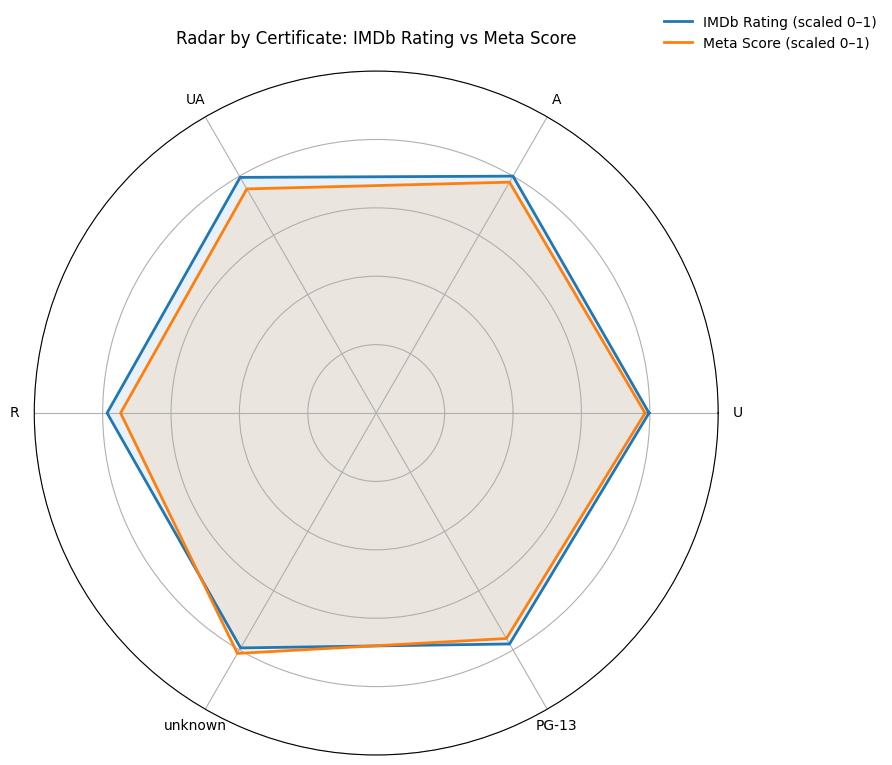

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# =========================
# 1) โหลดไฟล์ Excel + เลือกชีต IMDb
# =========================
file_path = '/content/drive/MyDrive/T.Ton/final_2.xlsx'
sheet_name = 'IMDb Data (Cleaned)'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# =========================
# 2) จับคู่ชื่อคอลัมน์แบบทนทาน
# =========================
def norm(s):
    return re.sub(r'[^a-z0-9]+', '', str(s).strip().lower())

cols = {norm(c): c for c in df.columns}

# หา certificate
cert_col = None
for k, orig in cols.items():
    if 'cert' in k:
        cert_col = orig
        break

# หา imdb_rating
imdb_col = None
for k, orig in cols.items():
    if 'imdb' in k and 'rating' in k:
        imdb_col = orig
        break

# หา meta_score
meta_col = None
for k, orig in cols.items():
    if 'meta' in k and 'score' in k:
        meta_col = orig
        break

if cert_col is None or imdb_col is None or meta_col is None:
    print("คอลัมน์ที่พบ:", list(df.columns))
    raise KeyError("กรุณาตรวจชื่อคอลัมน์ certificate / imdb_rating / meta_score")

# =========================
# 3) ทำความสะอาดข้อมูล
# =========================
use = df[[cert_col, imdb_col, meta_col]].copy()
use[imdb_col] = pd.to_numeric(use[imdb_col], errors='coerce')
use[meta_col] = pd.to_numeric(use[meta_col], errors='coerce')
use = use.dropna()

# =========================
# 4) สรุปค่าเฉลี่ยต่อ Certificate
# =========================
agg = (
    use.groupby(cert_col)
       .agg(
           imdb_mean = (imdb_col, 'mean'),
           meta_mean = (meta_col, 'mean'),
           n = (imdb_col, 'count')
       )
       .reset_index()
)

MIN_COUNT = 5
agg = agg[agg['n'] >= MIN_COUNT]
TOP_K = 6
agg = agg.sort_values('n', ascending=False).head(TOP_K)

labels = agg[cert_col].tolist()
k = len(labels)

# =========================
# 5) สเกลค่า
# =========================
imdb_scaled = (agg['imdb_mean'].clip(0, 10) / 10.0).values
meta_scaled = (agg['meta_mean'].clip(0, 100) / 100.0).values

angles = np.linspace(0, 2*np.pi, k, endpoint=False)
angles_closed = np.concatenate([angles, angles[:1]])
imdb_c = np.concatenate([imdb_scaled, imdb_scaled[:1]])
meta_c = np.concatenate([meta_scaled, meta_scaled[:1]])

# =========================
# 6) วาด Radar Chart
# =========================
plt.figure(figsize=(9, 9))
ax = plt.subplot(111, polar=True)

ax.plot(angles_closed, imdb_c, linewidth=2, label='IMDb Rating (scaled 0–1)')
ax.fill(angles_closed, imdb_c, alpha=0.10)

ax.plot(angles_closed, meta_c, linewidth=2, label='Meta Score (scaled 0–1)')
ax.fill(angles_closed, meta_c, alpha=0.10)

ax.set_xticks(angles)
ax.set_xticklabels(labels)

ax.set_ylim(0, 1)
ax.set_yticklabels([])
ax.set_title('Radar by Certificate: IMDb Rating vs Meta Score', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1.10), frameon=False)

plt.tight_layout()
plt.show()



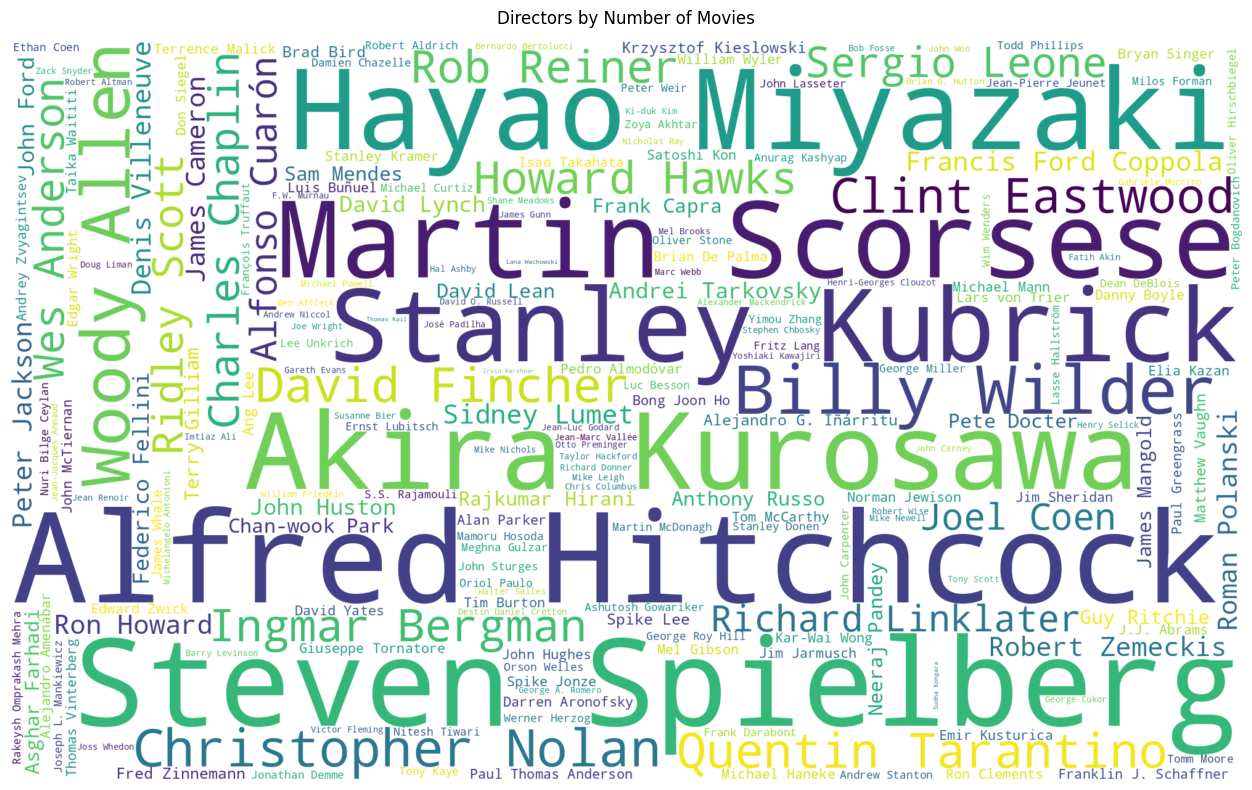

Saved to /content/director_wordcloud.png


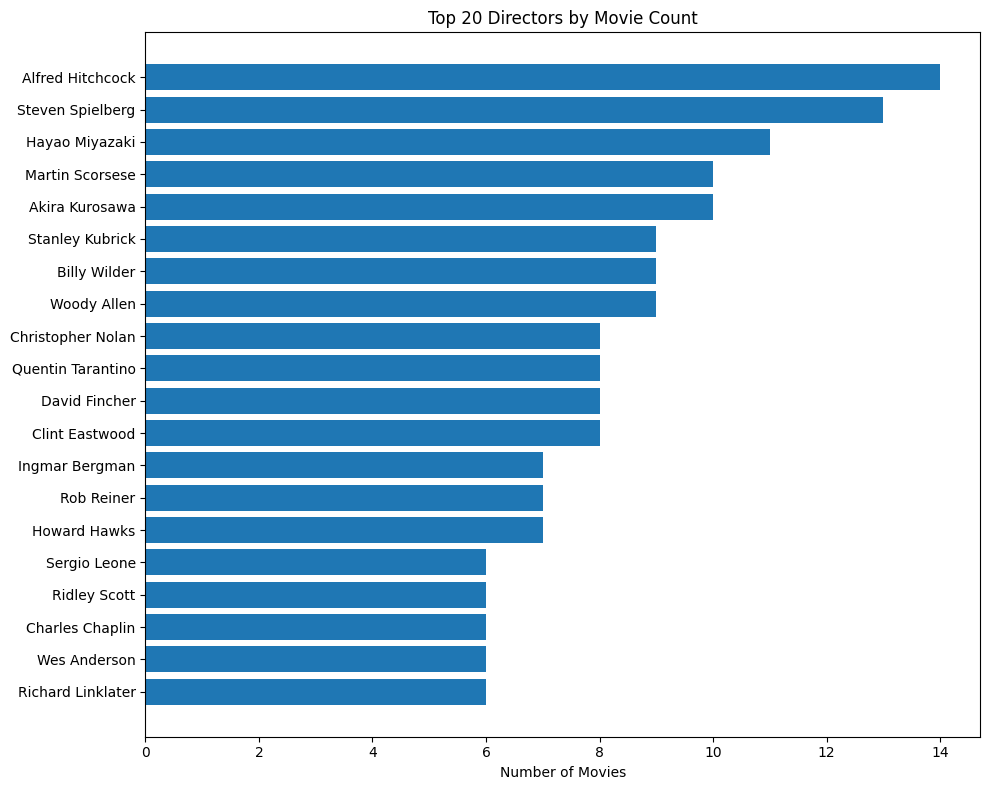

In [ ]:
# ======================================================
# Word Cloud ของ Director (นับตามจำนวนหนังที่กำกับ)
# ======================================================
!pip -q install wordcloud

import pandas as pd
import numpy as np
from collections import Counter
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ---------- 1) Config ไฟล์/ชีต ----------
file_path = '/content/drive/MyDrive/T.Ton/final_2.xlsx'

# ถ้าต้องการใช้ทั้งสองชีต ให้ตั้งเป็น True
USE_BOTH_SHEETS = False

# ---------- 2) โหลดข้อมูล ----------
if USE_BOTH_SHEETS:
    df1 = pd.read_excel(file_path, sheet_name='NF')
else:
    df = pd.read_excel(file_path, sheet_name=sheet_name)

# ---------- (ตัวเลือก) กรองเฉพาะ Netflix Original ----------
# ถ้าในชีตมีคอลัมน์ movie_type == "original_netflix" และอยากดูเฉพาะออริจินัล ให้เปิดบรรทัดด้านล่าง
# df = df[df.get('movie_type', '').astype(str).str.lower().eq('original_netflix')]

# ---------- 3) เตรียมคอลัมน์ director ----------
# ชื่อคอลัมน์ "director" ตามภาพหน้าจอที่ให้มา
col = 'director'
if col not in df.columns:
    raise ValueError(f"ไม่พบคอลัมน์ '{col}' ในชีต {sheet_name}. คอลัมน์ที่มี: {list(df.columns)}")

# เติมค่าว่างเป็น NaN -> ตัดออก
dirs = df[col].dropna().astype(str)

# แตกชื่อผู้กำกับหลายคนในแถวเดียว:
# รองรับตัวคั่น ,  &  and  /  ; และลดช่องว่างซ้ำ
split_pattern = re.compile(r'\s*(?:,|&| and |/|;)\s*', flags=re.IGNORECASE)

expanded = []
for raw in dirs:
    # ขจัดคำไม่รู้จัก
    if str(raw).strip().lower() in {'unknown', 'nan', 'not listed', 'not listed '}:
        continue
    parts = [p.strip() for p in split_pattern.split(raw) if p.strip()]
    expanded.extend(parts)

# ---------- 4) นับความถี่แบบ case-insensitive ----------
# map casing ให้คงรูปแบบที่พบครั้งแรก แต่นับแบบ lower
seen = {}
for name in expanded:
    key = name.lower()
    if key not in seen:
        seen[key] = name  # เก็บรูปสะกดแรกไว้ใช้แสดงผล

counts_ci = Counter([n.lower() for n in expanded])

# frequencies พร้อมชื่อที่อ่านง่าย
freqs = {seen[k]: v for k, v in counts_ci.items() if seen.get(k)}

# ---------- 5) สร้าง Word Cloud ----------
# หมายเหตุ: ถ้าชื่อไทย/UTF-8 ไม่ขึ้น ให้กำหนด font_path เป็นฟอนต์ที่รองรับไทย
wc = WordCloud(
    width=2000, height=1200,
    background_color="white",
    collocations=False,  # ไม่รวมคำซ้ำเป็น phrase
).generate_from_frequencies(freqs)

plt.figure(figsize=(14, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Directors by Number of Movies', pad=12)
plt.tight_layout()
plt.show()

# (บันทึกไฟล์ภาพ)
wc.to_file('/content/director_wordcloud.png')
print("Saved to /content/director_wordcloud.png")

# ---------- 6) (เสริม) กราฟแท่ง Top-20 ----------
top_n = 20
top_items = sorted(freqs.items(), key=lambda x: x[1], reverse=True)[:top_n]
names = [k for k, v in top_items][::-1]
vals  = [v for k, v in top_items][::-1]

plt.figure(figsize=(10, 8))
plt.barh(names, vals)
plt.xlabel('Number of Movies')
plt.title(f'Top {top_n} Directors by Movie Count')
plt.tight_layout()
plt.show()


ใช้ชีต: 'NF'
ช่วงปีที่ใช้: 2012–2021 | แถวที่เหลือ: 4752
ตัวอย่าง Top 10:
                 director  movie_count
1529            Jan Suter           21
3054         RaÃºl Campos           19
3572          Suhas Kadav           16
1565            Jay Karas           15
2301         Marcus Raboy           15
3010        Rajiv Chilaka           15
1563          Jay Chapman           12
620   Cathy Garcia-Molina           10
992      Don Michael Paul           10
1149     Fernando AyllÃ³n            8


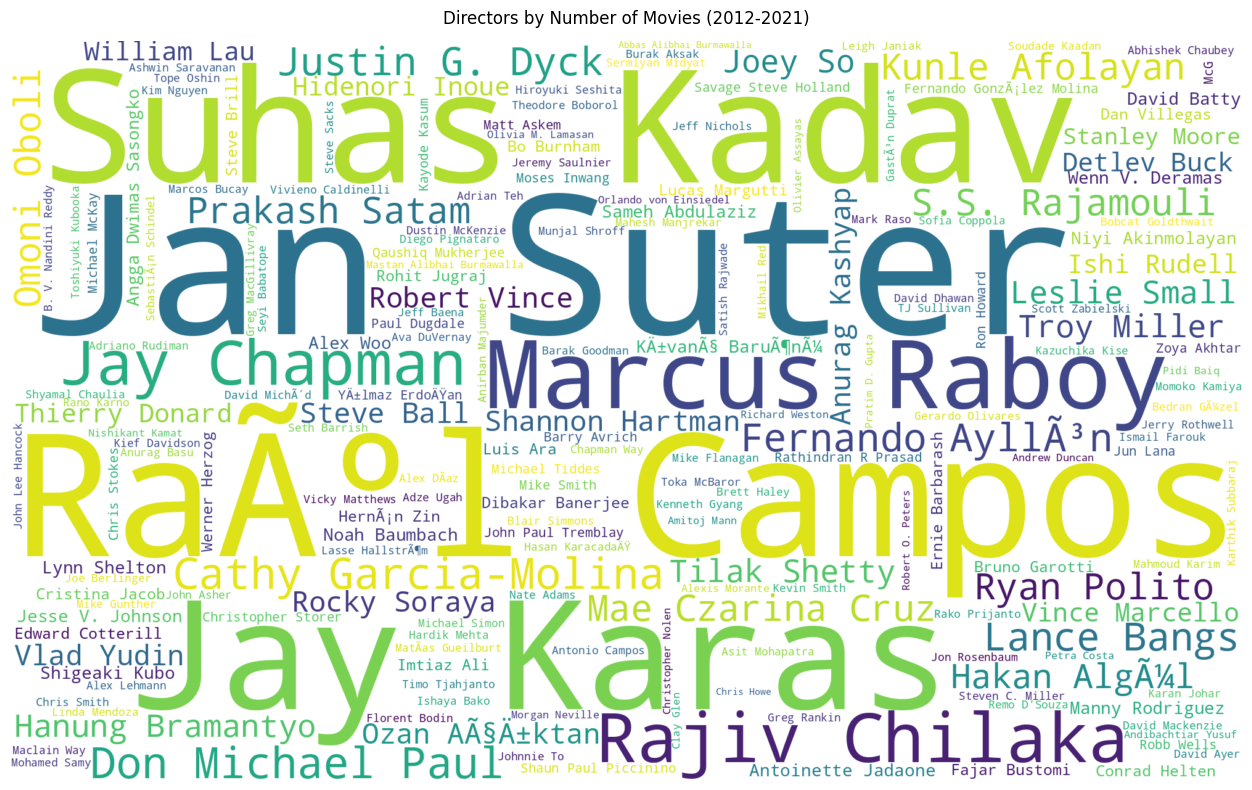

Saved: /content/director_wordcloud_last10y.png


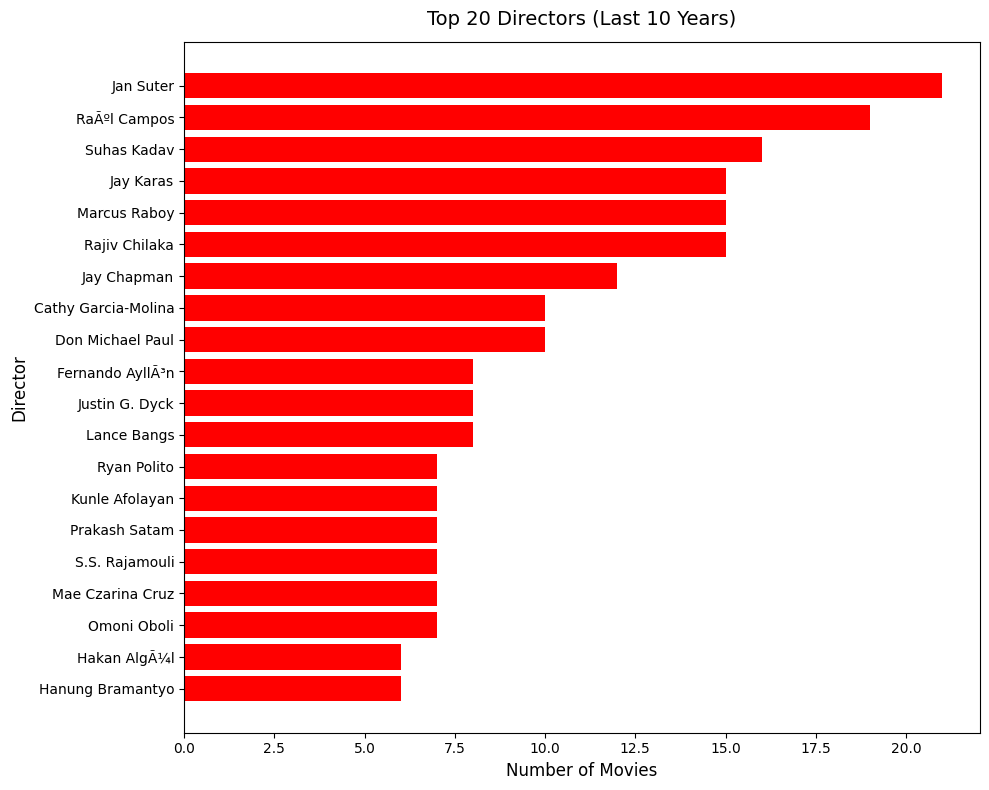

In [ ]:
# ======================================================
# Word Cloud: Directors (ถ่วงน้ำหนักด้วยจำนวน movie_title)
# แหล่งข้อมูล: /content/drive/MyDrive/T.Ton/final_1.xlsx
# ชีต: Merged Netflix and Rotten Tomat
# ช่วงเวลา: 10 ปีล่าสุดจาก release_year
# ======================================================

!pip -q install wordcloud

import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ---------------- 1) ตั้งค่าไฟล์/ชีต ----------------
file_path = '/content/drive/MyDrive/T.Ton/final_2.xlsx'
preferred_sheet = 'NF'   # ตามที่ตรวจพบในไฟล์

# ฟังก์ชันเลือกชีตแบบทนทาน (กันช่องว่าง/ตัดชื่อ)
def pick_sheet(path, target):
    xls = pd.ExcelFile(path)
    sheets = xls.sheet_names

    def norm(s):  # normalize: ตัดช่องว่างซ้ำ/ตัวพิมพ์
        return re.sub(r'\s+', ' ', str(s)).strip().lower()

    nt = norm(target)

    # 1) exact (normalized)
    for s in sheets:
        if norm(s) == nt:
            return s

    # 2) ใกล้เคียง/เป็นสับเซต
    for s in sheets:
        ns = norm(s)
        if nt in ns or ns in nt:
            return s

    # 3) ตกลงใช้ชีตแรกและเตือน
    print(f"[Warn] ไม่พบชื่อชีตที่ตรงกับ '{target}' ใช้ชีตแรกแทน -> {sheets[0]!r}")
    return sheets[0]

sheet_name = pick_sheet(file_path, preferred_sheet)
print("ใช้ชีต:", repr(sheet_name))

# ---------------- 2) โหลด & เตรียมข้อมูล ----------------
df = pd.read_excel(file_path, sheet_name=sheet_name)

# ใช้เฉพาะคอลัมน์ที่ต้องมี
need = ['movie_title', 'director', 'release_year']
missing = [c for c in need if c not in df.columns]
if missing:
    raise ValueError(f"ไม่พบคอลัมน์จำเป็น: {missing} | คอลัมน์ทั้งหมด: {list(df.columns)[:20]}")

df = df[need].copy()
df = df.dropna(subset=['movie_title', 'release_year'])

# บังคับปีเป็นตัวเลข และตัด NaN ออก
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df = df.dropna(subset=['release_year'])
df['release_year'] = df['release_year'].astype(int)

# ---------------- 3) เลือก 10 ปีล่าสุด ----------------
max_year = int(df['release_year'].max())
min_year = max_year - 9
df = df[df['release_year'].between(min_year, max_year)]
print(f"ช่วงปีที่ใช้: {min_year}–{max_year} | แถวที่เหลือ: {len(df)}")

# ---------------- 4) แตกชื่อผู้กำกับ & นับจำนวนเรื่อง ----------------
# รองรับตัวคั่น: ',', '&', 'and', '/', ';'
split_pattern = re.compile(r'\s*(?:,|&| and |/|;)\s*', flags=re.IGNORECASE)

rows = []
for _, r in df.iterrows():
    d = (str(r['director']) if pd.notna(r['director']) else '').strip()
    if d.lower() in {'unknown', 'not listed', 'nan', ''}:
        continue
    parts = [p.strip() for p in split_pattern.split(d) if p.strip()]
    for p in parts:
        rows.append((p, r['movie_title']))

if not rows:
    raise RuntimeError("ไม่มีชื่อผู้กำกับหลังจากทำความสะอาดข้อมูล")

temp = pd.DataFrame(rows, columns=['director', 'movie_title'])
# กันค่าซ้ำ (กรณีคนเดียว-เรื่องเดียวซ้ำหลายแถว)
temp = temp.drop_duplicates(subset=['director', 'movie_title'])

counts = (
    temp.groupby('director', as_index=False)['movie_title']
        .count()
        .rename(columns={'movie_title': 'movie_count'})
        .sort_values('movie_count', ascending=False)
)

print("ตัวอย่าง Top 10:")
print(counts.head(10))

# ---------------- 5) ทำ Word Cloud ----------------
# ถ้าต้องการฟอนต์ไทยให้ใส่ path ฟอนต์ เช่น '/usr/share/fonts/truetype/NotoSansThai-Regular.ttf'
font_path = None  # เปลี่ยนเป็น path ฟอนต์ถ้ามีภาษาไทย
freqs = dict(zip(counts['director'], counts['movie_count']))

wc = WordCloud(
    width=2000, height=1200,
    background_color="white",
    collocations=False,
    font_path=font_path
).generate_from_frequencies(freqs)

plt.figure(figsize=(14, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title(f'Directors by Number of Movies ({min_year}-{max_year})', pad=12)
plt.tight_layout()
plt.show()

# บันทึกรูป
wc.to_file('/content/director_wordcloud_last10y.png')
print("Saved:", '/content/director_wordcloud_last10y.png')

# ---------------- 6) กราฟแท่ง Top-20 (อ่านค่าง่าย) ----------------
top_n = 20
top = counts.head(top_n).iloc[::-1]  # Reverse เพื่อให้แสดงจากมากไปน้อยแบบสวยงาม

plt.figure(figsize=(10, 8))
plt.barh(top['director'], top['movie_count'], color='red')  # ✅ ใช้สีแดง

plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.title(f'Top {top_n} Directors (Last 10 Years)', fontsize=14, pad=12)

plt.tight_layout()
plt.show()



